In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
import torchvision

In [3]:
import kornia as K

In [4]:
img_bgr: np.ndarray = cv2.imread('../data/doraemon.png', cv2.IMREAD_COLOR)

In [5]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr) # CxHxWx
x_bgr = x_bgr[None,...].float() / 255.

x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)
x_gray = K.color.rgb_to_grayscale(x_rgb)

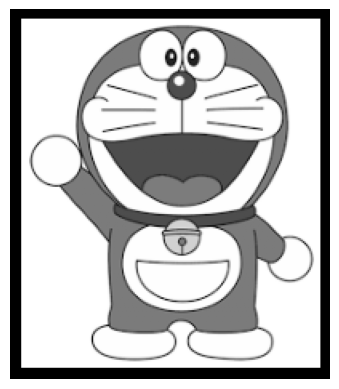

In [6]:
def imshow(input: torch.Tensor):
    out = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

imshow(x_gray)

## 1st order derivates

https://kornia.readthedocs.io/en/latest/filters.html?highlight=spatial_gradient#kornia.filters.spatial_gradient

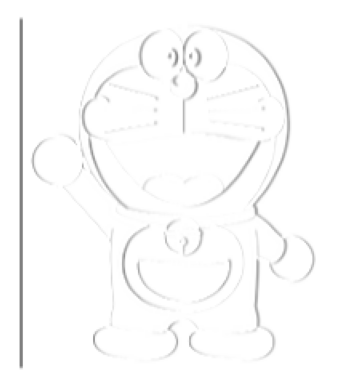

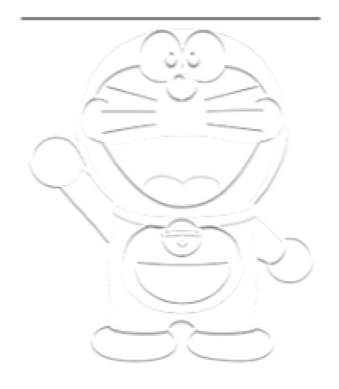

In [7]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=1) # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

# Show first derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

# Show first derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

## 2nd order derivatives

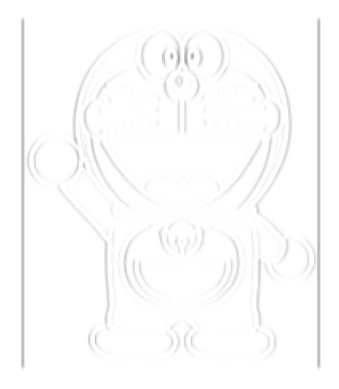

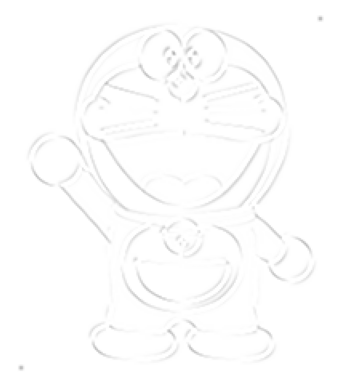

In [8]:
grads: torch.Tensor = K.filters.spatial_gradient(x_gray, order=2) # BxCx2xHxW
grads_x = grads[:, :, 0]
grads_y = grads[:, :, 1]

# Show second derivatives in x
imshow(1. - grads_x.clamp(0., 1.))

# Show second derivatives in y
imshow(1. - grads_y.clamp(0., 1.))

## Laplacian edges

https://kornia.readthedocs.io/en/latest/filters.html?highlight=sobel#kornia.filters.Laplacian

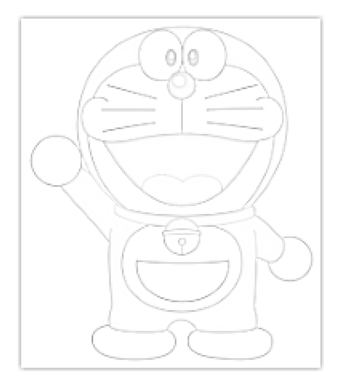

In [9]:
x_laplacian: torch.Tensor = K.filters.laplacian(x_gray, kernel_size=5)
imshow(1. - x_laplacian.clamp(0., 1.))

## Canny edges

https://kornia.readthedocs.io/en/latest/filters.html#kornia.filters.Canny

Handcraft-engineering algoirithm
https://en.wikipedia.org/wiki/Canny_edge_detector

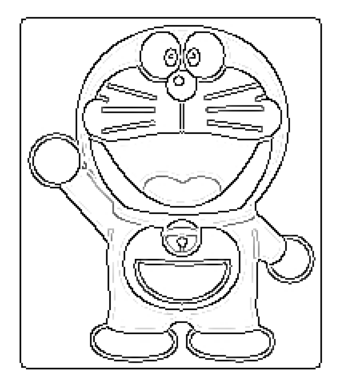

In [10]:
x_laplacian: torch.Tensor = K.filters.canny(x_gray)[0]
imshow(1. - x_laplacian.clamp(0., 1.))